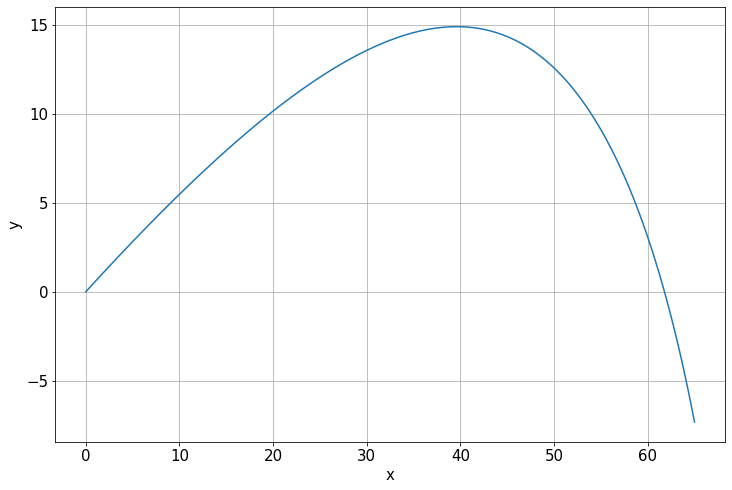

time : 3.4732414940786835s
R    : 61.80007725377659m


In [49]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 15})

m = 0.25
v0 = 50
Cd = 0.03
g = 9.80665

# 운동의 미분방정식이 f 일 때 공의 비행시간과 거리 R
def f(t,y):
    x0, x1, y0, y1 = y
    f1 = x1
    f2 = -Cd/m*x1*(x1**2+y1**2)**0.25
    f3 = y1
    f4 = -Cd/m*y1*(x1**2+y1**2)**0.25 - g
    return [f1,f2,f3,f4]

def yfe(t,y):
    return y[2] 

y0 = [0,v0*np.cos(np.pi/6),0,v0*np.sin(np.pi/6)]
tspan = [0,4]
teval = np.linspace(0,max(tspan),100)
sol = solve_ivp(f,tspan,y0,t_eval=teval,rtol=1e-6,atol=1e-10,events=yfe)

plt.plot(sol.y[0],sol.y[2],ms=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
print(f'time : {sol.t_events[0][1]}s\nR    : {sol.y_events[0][1][0]}m')

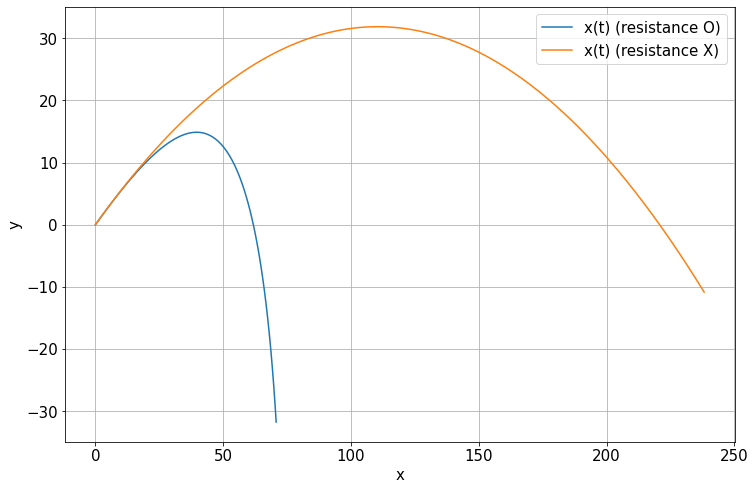

t when resistance O x = 25 : 0.7615289945655705
t when no resistance x = 25 : 0.5773502691896256


In [44]:
m = 0.25
v0 = 50
Cd = 0.03
g = 9.80665

# 저항이 있을 때와 없을 때의 궤적을 그리고 수평위치 x가 25가 될 때의 시간

def f(t,y):
    x0, x1, y0, y1 = y
    f1 = x1
    f2 = -(Cd/m) * x1 * (x1**2 + y1**2)**0.25
    f3 = y1
    f4 = -(Cd/m) * y1 * (x1**2 + y1**2)**0.25 - g
    return [f1,f2,f3,f4]

def nf(t,y):
    x0, x1, y0, y1 = y
    f1 = x1
    f2 = 0
    f3 = y1
    f4 = - g
    return [f1,f2,f3,f4]

def xfe(t,y):
    return y[0] - 25 

y0 = [0,v0*np.cos(np.pi/6),0,v0*np.sin(np.pi/6)]
tspan = [0,5.5]
teval = np.linspace(0,max(tspan),100)
s_sol = solve_ivp(f,tspan,y0,t_eval=teval,rtol=1e-6,atol=1e-10,events=xfe)
ns_sol = solve_ivp(nf,tspan,y0,t_eval=teval,rtol=1e-6,atol=1e-10,events=xfe)
plt.plot(s_sol.y[0],s_sol.y[2],ms=3,label='x(t) (resistance O)')
plt.plot(ns_sol.y[0],ns_sol.y[2],ms=3,label='x(t) (resistance X)')
#plt.plot(ns_sol.t,25*np.ones(len(ns_sol.t)),label='x = 25')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
print(f't when resistance O x = 25 : {s_sol.t_events[0][0]}')
print(f't when no resistance x = 25 : {ns_sol.t_events[0][0]}')

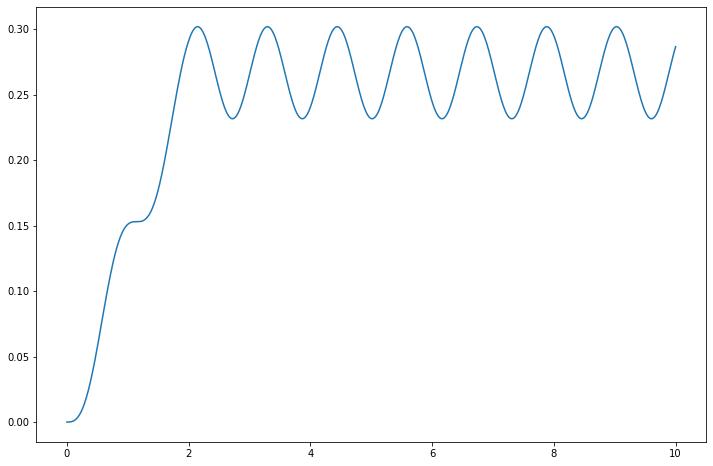

질량의 최대변위 : 0.30179302797650925


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 2.5
k = 75

def P(t):
    return 10*t - 10*(t-2)*np.heaviside(t-2,1)


def f(t,y):
    y0, y1 = y
    f1 = y1
    f2 = P(t)/m -k*y0/m
    return [f1, f2]

t = np.arange(0,20,0.1)
#plt.plot(t,P(t))
y0 = [0,0]
tspan = [0,10]
teval = np.linspace(0,max(tspan),1000)
sol = solve_ivp(f,tspan,y0,t_eval=teval,rtol=1e-6,atol=1e-10)
plt.plot(sol.t,sol.y[0])
plt.show()
print('질량의 최대변위 :',sol.y[0].max())

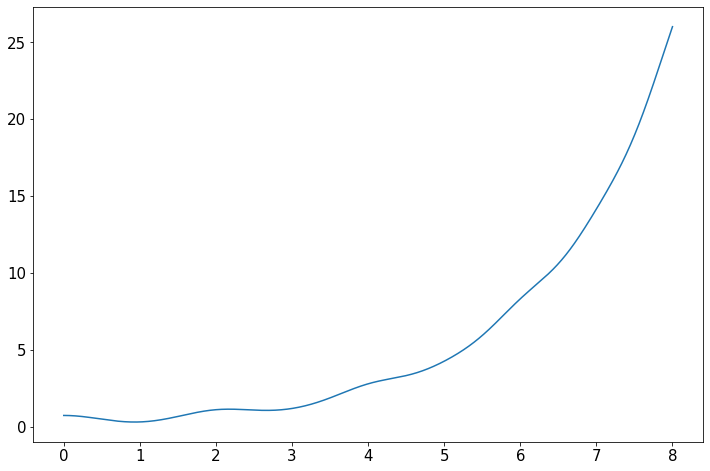

물체가 막대기 끝에 도달할 때의 시간 : 7.583560412365226 s


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.80665

def f(t,y):
    r1, r2 = y
    f1 = r2
    f2 = ((np.pi**2/12)**2)*r1*np.sin(np.pi*t)**2 - g*np.sin(np.pi/12*np.cos(np.pi*t))
    return [f1, f2]

def rfe(t,y):
    return y[0] - 20

y0 = [0.75,0]
tspan = [0,8]
teval = np.linspace(0,max(tspan),1000)
sol = solve_ivp(f,tspan,y0,t_eval=teval,rtol=1e-6,atol=1e-10,events=rfe)
plt.plot(sol.t,sol.y[0])
plt.show()
print('물체가 막대기 끝에 도달할 때의 시간 :', sol.t_events[0][0],'s')

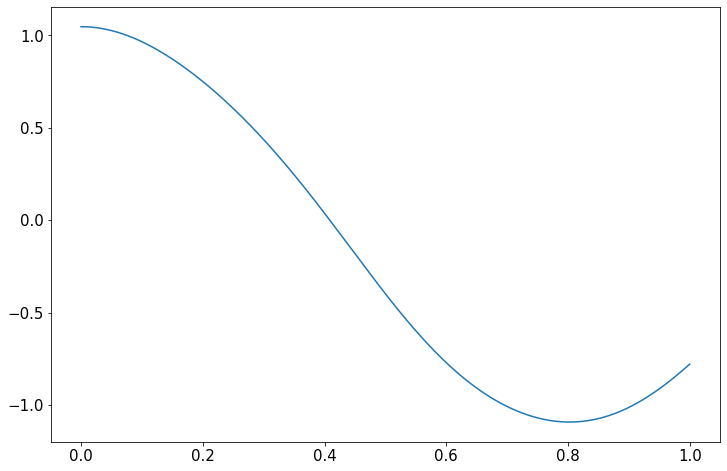

time when theta = 0 : 0.40875149657704807 
r when theta = 0    : 0.5401097068059636


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.80665
k = 40
L = 0.5
m = 0.25

def f(t,y):
    r1, r2, theta1, theta2 = y
    f1 = r2
    f2 = r1*theta2 + g*np.cos(theta1) - k/m*(r1 - L)
    f3 = theta2
    f4 = (-2*r2*theta2 - g*np.sin(theta1))/r1
    return [f1, f2, f3, f4]

def tfe(t,y):
    return y[2]
    
    
y0 = [L,0,np.pi/3,0]
tspan = [0,1]
teval = np.linspace(0,max(tspan),1000)
sol = solve_ivp(f,tspan,y0,t_eval=teval,rtol=1e-6,atol=1e-10,events=tfe)
plt.plot(sol.t,sol.y[2])
plt.show()
print('time when theta = 0 :',sol.t_events[0][0],'\nr when theta = 0    :',sol.y_events[0][0][0])